## 1

### (a)

Long-only and Open-end, it is the first retail fund to do so

### (b)

1. Long only
2. Monthly rebalance that brings great transaction cost
3. Not used the whole markets to be the portfolio

### (c)
There might be short-term reversal, and the rebalancing transaction cost is also very high in this situation

## 2

In [2]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))

import cmds.portfolio_management_helper as pmh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_data = pd.read_excel('../data/momentum_data.xlsx',sheet_name = None)
sheets = list(raw_data.keys())

ff_factors = raw_data[sheets[1]].set_index('Date')
momentum = raw_data[sheets[2]].set_index('Date')
mom_deciles = raw_data[sheets[3]].set_index('Date')
tercile_port = raw_data[sheets[4]].set_index('Date')
rf = raw_data[sheets[5]].set_index('Date')

ff_factors['UMD'] = momentum['UMD']

### 2.1

#### (a)

In [4]:
annual_factor = 12

display("1927-2024:")
display(pmh.calc_summary_statistics(ff_factors, annual_factor=annual_factor, provided_excess_returns=True, keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe', 'Skewness', 'MKT Correlation', 'HML Correlation'], keep_indexes=['UMD']))

display("1927-1993:")
display(pmh.calc_summary_statistics(ff_factors.loc['1927':'1993'], annual_factor=annual_factor, provided_excess_returns=True, keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe', 'Skewness', 'MKT Correlation', 'HML Correlation'], keep_indexes=['UMD']))

display("1994-2008:")
display(pmh.calc_summary_statistics(ff_factors.loc['1994':'2008'], annual_factor=annual_factor, provided_excess_returns=True, keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe', 'Skewness', 'MKT Correlation', 'HML Correlation'], keep_indexes=['UMD']))

display("2009-2024:")
display(pmh.calc_summary_statistics(ff_factors.loc['2009':'2024'], annual_factor=annual_factor, provided_excess_returns=True, keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe', 'Skewness', 'MKT Correlation', 'HML Correlation'], keep_indexes=['UMD']))

'1927-2024:'

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD,0.0753,0.1625,0.4635,-2.9905,-0.3443,-0.4064


'1927-1993:'

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD,0.0901,0.1600,0.5630,-3.8082,-0.3625,-0.4950


'1994-2008:'

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD,0.1044,0.1756,0.5945,-0.5820,-0.2345,-0.1294


'2009-2024:'

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD,-0.0151,0.1585,-0.0952,-2.6910,-0.3676,-0.3209


In [5]:
annual_factor = 12
timeframes={'1927-2024': ['1927-01-31', None],
            '1927-1993': ['1927-01-31','1993-12-31'],
            '1994-2008': ['1994-01-31','2008-12-31'],
            '2009-2024': ['2009-01-31', None]}

full_sample = pmh.calc_summary_statistics(ff_factors, annual_factor=annual_factor, correlations=['MKT', 'HML'], keep_columns=['Mean', 'Vol', 'Sharpe', 'Skewness', 'Correlation'], timeframes=timeframes, keep_indexes='UMD')
full_sample.drop(['Mean', 'Vol', 'Sharpe'], axis = 1, inplace=True)
full_sample

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD 1927-2024,0.0753,0.1625,0.4635,-2.9905,-0.3443,-0.4064
UMD 1927-1993,0.0901,0.1600,0.5630,-3.8082,-0.3625,-0.4950
UMD 1994-2008,0.1044,0.1756,0.5945,-0.5820,-0.2345,-0.1294
UMD 2009-2024,-0.0151,0.1585,-0.0952,-2.6910,-0.3676,-0.3209


#### (b)

Yes. The analysis is focused on the Annualized Mean. Momentum is showing a negative return from 2009 onwards, compared to the positive returns it previously had. Vol is quite stable.

#### (c)

The factor has been profitable when AQR was making this argument, and it has a negative correlation to the other factors which makes it very valuable as a diversifier. Even if the true mean return is 0 due to transaction cost, it still has a negative correlation to the other factors, so it's still very valuable as a diversifier. 

### 2.2

In [6]:
mom_long = (tercile_port['BIG HiPRIOR'] + tercile_port['SMALL HiPRIOR'])/2 - rf['RF']
ff_factors['UMD Long Only'] = mom_long
display("1994-2024:")
display(pmh.calc_summary_statistics(ff_factors.loc['1994':'2024'], annual_factor=12, provided_excess_returns=True, keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe', 'Skewness', 'MKT Correlation', 'HML Correlation'], keep_indexes=['UMD']))

'1994-2024:'

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
UMD,0.0432,0.1677,0.2575,-1.4460,-0.3062,-0.2152
UMD Long Only,0.1172,0.1784,0.6569,-0.4448,0.9036,-0.1190


#### (b)
The sharpe ratio of long-only is generally higher, especially in the post-2009 period, so it's more attractive in terms of its mean and vol.

#### (c)

The correlation to MKT is now huge close to 1, and the correlation to HML has also increased. The long only implementation is no longer a good diversifier.

#### (d)

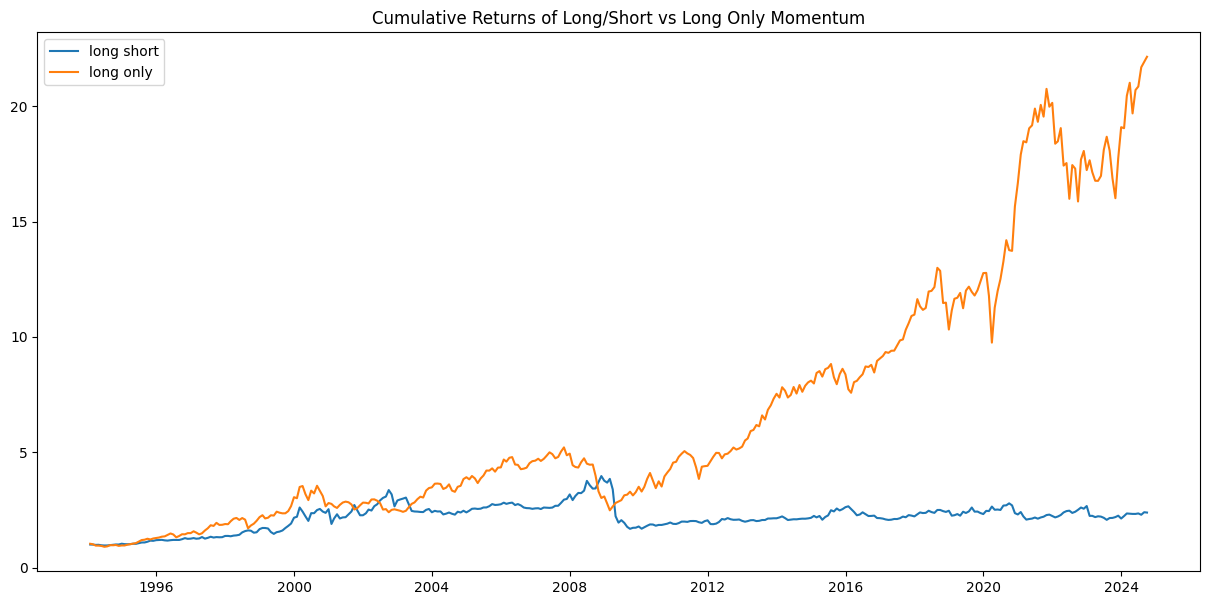

In [7]:
plt.figure(figsize=(15,7))

plt.plot((ff_factors['UMD'] + 1).loc['1994':'2024'].cumprod(), label="long short")
plt.plot((ff_factors['UMD Long Only'] + 1).loc['1994':'2024'].cumprod(), label='long only')
plt.title('Cumulative Returns of Long/Short vs Long Only Momentum')
plt.legend()
plt.show()

### 2.3

#### (a)

In [8]:
mom_deciles

ff_factors['M1'] = mom_deciles['Hi PRIOR'] - mom_deciles['Lo PRIOR']
ff_factors['M3'] = mom_deciles.iloc[:,-3:].mean(axis = 1) - mom_deciles.iloc[:,:3].mean(axis = 1)
ff_factors['M5'] = mom_deciles.iloc[:,-5:].mean(axis = 1) - mom_deciles.iloc[:,:5].mean(axis = 1)

display(pmh.calc_summary_statistics(ff_factors.loc['1994':'2024'], annual_factor=12, provided_excess_returns=True, keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe', 'Skewness', 'MKT Correlation', 'HML Correlation'], keep_indexes=['M1', 'M3', 'M5']))

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation,HML Correlation
M1,0.0820,0.2990,0.2742,-1.3046,-0.3197,-0.2335
M3,0.0286,0.1934,0.1476,-1.3450,-0.3617,-0.2115
M5,0.0164,0.1340,0.1225,-1.4159,-0.3486,-0.2122


#### (b)

Yes. We see that only using the top decile does provide a highest mean return and highest sharpe, and using 5 deciles provides the lowest mean return and sharpe. It is because that there were more benefits we obtained than just diversification

#### (c)

They should use 1-decile, because the sharpe ratio is significantly better.

#### (d)

The Fama-French construction has higher return and lower volatility, resulting with higher sharpe ratio. The correlation of the 3-decile against MKT is slightly smaller, however. 

### 2.4

#### (a)

In [9]:
tercile_port

ff_factors['M all'] = ff_factors['UMD']
ff_factors.drop(['UMD'], axis = 1, inplace=True)
ff_factors['M small'] = tercile_port['SMALL HiPRIOR'] - tercile_port['SMALL LoPRIOR']
ff_factors['M big'] = tercile_port['BIG HiPRIOR'] - tercile_port['BIG LoPRIOR']

display(pmh.calc_summary_statistics(ff_factors.loc['1994':'2024'], annual_factor=12, provided_excess_returns=True, keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe', 'Skewness', 'MKT Correlation'], keep_indexes=['M all', 'M small', 'M big']))

,Annualized Mean,Annualized Vol,Annualized Sharpe,Skewness,MKT Correlation
M all,0.0432,0.1677,0.2575,-1.4460,-0.3062
M small,0.0632,0.1696,0.3726,-1.7636,-0.3040
M big,0.0232,0.1825,0.1270,-0.8791,-0.2802


#### (b)

Yes. The sharpe ratio from the small stocks is much higher than the large stocks. It is that the M small portfolio has generally higher mean but similar vol compared to others.

### 2.5

The long only approach yields a very high correlation to the market, so it's not a great diversifier like the long-short approach would be. 

Quarterly rebalancing could result in significant deviations from the benchmark. Much of the return is coming from the small stocks, so I think dealing with the execution challenges of trading small stocks is necessary. 

## 4

### 4.1

#### (a)

In [10]:
bad = pmh.read_excel_default('../data/barnstable_analysis_data.xlsx', sheet_name='data')
bad.fillna(method='ffill', inplace=True)

bad['rm'] = bad['SPX']
bad['rm tilde'] = bad['SPX'] - bad['TB1M']
bad['rf'] = bad['TB1M']

bad['log rm'] = np.log(bad['rm'] + 1)
bad['log rm tilde'] = np.log(bad['rm tilde'] + 1)
bad['log rf'] = np.log(bad['rf'] + 1)

col = pd.MultiIndex.from_tuples(
    [('level', 'rm'), ('level', 'rm tilde'), ('level', 'rf'), ('log', 'rm'), ('log', 'rm tilde'), ('log', 'rf')]
)

tmp = bad[['rm', 'rm tilde', 'rf', 'log rm', 'log rm tilde', 'log rf']]
tmp.columns = col

index = pd.MultiIndex.from_tuples(
    [('1965-1999', 'mean'), ('1965-1999', 'vol'), ('2000-2024', 'mean'), ('2000-2024', 'vol'), ('1926-2024', 'mean'), ('1926-2024', 'vol')],
    names=['Sample', 'Statistic']
)

out = pd.DataFrame([tmp.loc['1965':'1999'].mean() * annual_factor, tmp.loc['1965':'1999'].std() * np.sqrt(annual_factor), 
                    tmp.loc['2000':'2024'].mean() * annual_factor, tmp.loc['2000':'2024'].std() * np.sqrt(annual_factor), 
                    tmp.loc['1926':'2024'].mean() * annual_factor, tmp.loc['1926':'2024'].std() * np.sqrt(annual_factor)], index=index)

out = out.T
display(out)

Sample         1965-1999        2000-2024        1926-2024       
Statistic           mean    vol      mean    vol      mean    vol
level rm          0.1294 0.1494    0.0873 0.1531    0.1155 0.1868
      rm tilde    0.0679 0.1501    0.0701 0.1533    0.0838 0.1871
      rf          0.0615 0.0072    0.0172 0.0055    0.0317 0.0085
log   rm          0.1176 0.1496    0.0753 0.1540    0.0978 0.1861
      rm tilde    0.0564 0.1511    0.0581 0.1545    0.0662 0.1866
      rf          0.0613 0.0071    0.0172 0.0055    0.0317 0.0085

#### (b)

The mean and vol of the full sample stats are in between those of the subsample stats. This makes sense since the full sample stats should reflect the average between all the subsamples. 

The level stats are all slightly larger than the log stats in regards mean, and the vol are similar. 

### 4.2

#### (a)

In [11]:
def prob(mu, sigma, h):
    return norm.cdf(np.sqrt(h)*mu/sigma)

mu, sigma = out['1965-1999'].loc[('log', 'rm tilde')]
h = 2000-1965
print(f"The stats of (a) is {prob(mu = -mu, sigma = sigma, h = h):,.2%}")

The stats of (a) is 1.36%


#### (b)(c)

SPX underperforming RF in the next 15 years after 1999: 7.42%
SPX underperforming RF in the next 30 years after 1999: 2.05%


<Axes: >

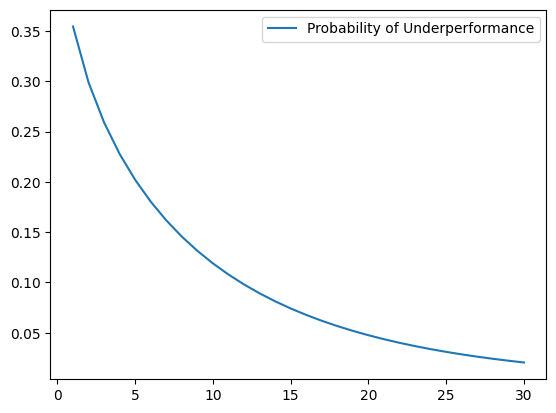

In [12]:
print(f'SPX underperforming RF in the next 15 years after 1999: {prob(mu = -mu, sigma = sigma, h = 15):,.2%}')

print(f'SPX underperforming RF in the next 30 years after 1999: {prob(mu = -mu, sigma = sigma, h = 30):,.2%}')

h = np.arange(30) + 1
probs = pd.DataFrame([prob(-mu, sigma, x) for x in h], columns=['Probability of Underperformance'], index = h)
probs.plot()

### 4.3

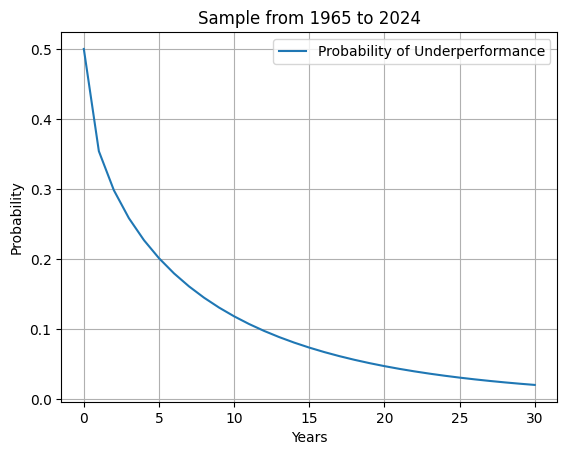

In [13]:
mu_1965_2024 = np.log((bad[bad.index.year >= 1965]['SPX'] - bad[bad.index.year >= 1965]['TB1M']) + 1).mean() * 12
sigma_1965_2024 = np.log((bad[bad.index.year >= 1965]['SPX'] - bad[bad.index.year >= 1965]['TB1M']) + 1).std() * np.sqrt(12)
h = np.arange(31)

plt.plot(h, norm.cdf(np.sqrt(h) * (-mu_1965_2024) / sigma_1965_2024), label = 'Probability of Underperformance')
plt.title('Sample from 1965 to 2024')
plt.xlabel('Years')
plt.ylabel('Probability')
plt.legend()
plt.grid()
plt.show()

### 4.4

In [14]:
estimated_mean, estimated_sigma = out.loc[('log', 'rm'), '1965-1999']
realized_mean, realized_sigma = out.loc[('log', 'rm'), '2000-2024']

print(f'Probability of underperformance in 2000-2024: {norm.cdf(np.sqrt(25) * (-(estimated_mean - realized_mean)) / estimated_sigma):.4%}')

Probability of underperformance in 2000-2024: 7.8458%
